In [1]:
#Creating a DB config file to add sensitive data as host, user, password, and db name
import db_config as db_cfg
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Creating Database connection

In [2]:
#getting Database connection data from config file to avoid adding personal data
engine_path = "postgresql://"+db_cfg.pgsql["user"]+":"+db_cfg.pgsql["passwd"]+"@"+db_cfg.pgsql["host"]+"/"+db_cfg.pgsql["db"]

In [3]:
#Creating engine path to create engine object 
engine = create_engine(engine_path)
connection = engine.connect()

In [4]:
#Creating DataFrame using query to get the most common salary ranges for employees
query= "select salary from salaries"
salaries_df = pd.read_sql(query, connection)

In [5]:
salaries_df

,salary
0,60117
1,65828
2,40006
3,40054
4,78228
...,...
300019,40000
300020,58058
300021,49597
300022,40000


In [6]:
salaries_df.shape

(300024, 1)

Text(0.5, 0, 'Salary Range')

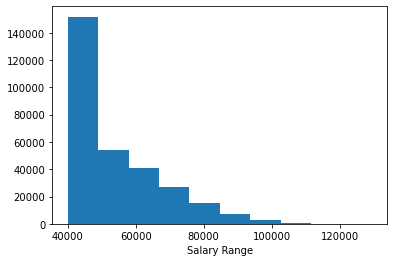

In [7]:
#Create a histogram to visualize the most common salary ranges for employees

plt.hist(salaries_df['salary'])
plt.xlabel("Salary Range")

In [15]:
#Create a bar chart of average salary by title
query_st = "select t.title, ceil(avg(s.salary)) as avg_salary from titles as t left join salaries as s on t.emp_no = s.emp_no group by t.title"
salaries_titles_df = pd.read_sql(query_st, connection)


In [17]:
salaries_titles_df

,title,avg_salary
0,Assistant Engineer,48494.0
1,Engineer,48540.0
2,Manager,51532.0
3,Senior Engineer,48507.0
4,Senior Staff,58504.0
5,Staff,58466.0
6,Technique Leader,48581.0


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

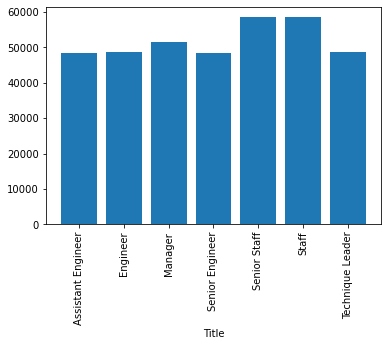

In [21]:
#Creating Bar Chart
plt.bar(salaries_titles_df['title'], height=salaries_titles_df['avg_salary'])
plt.xlabel('Title')
plt.xticks(rotation='vertical')